# Obtener Estados

In [20]:
import mapper_getfiles as mapfiles
import mapper as Mapper
import general_codes as gc


In [21]:
mapfiles.get_statefile('all')  # Mexico
mapfiles.get_statefile('sonora') # Sonora

In [22]:

mexico = Mapper.new_map()
sonora = Mapper.new_map(region = 'sonora')


RepMX


In [23]:
sonora_d = sonora.copy()

In [24]:
import pandas as pd

color_codes = pd.read_excel('data\\MunicipiosTipso.xlsx', index_col=0)

mun_list = list(color_codes.index)
mun_order = sonora.index.to_list()
sonora_d['Tipo'] = ''
for m in mun_list:
        sonora_d.loc[m, 'Tipo'] = color_codes.loc[m,'Tipo']


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


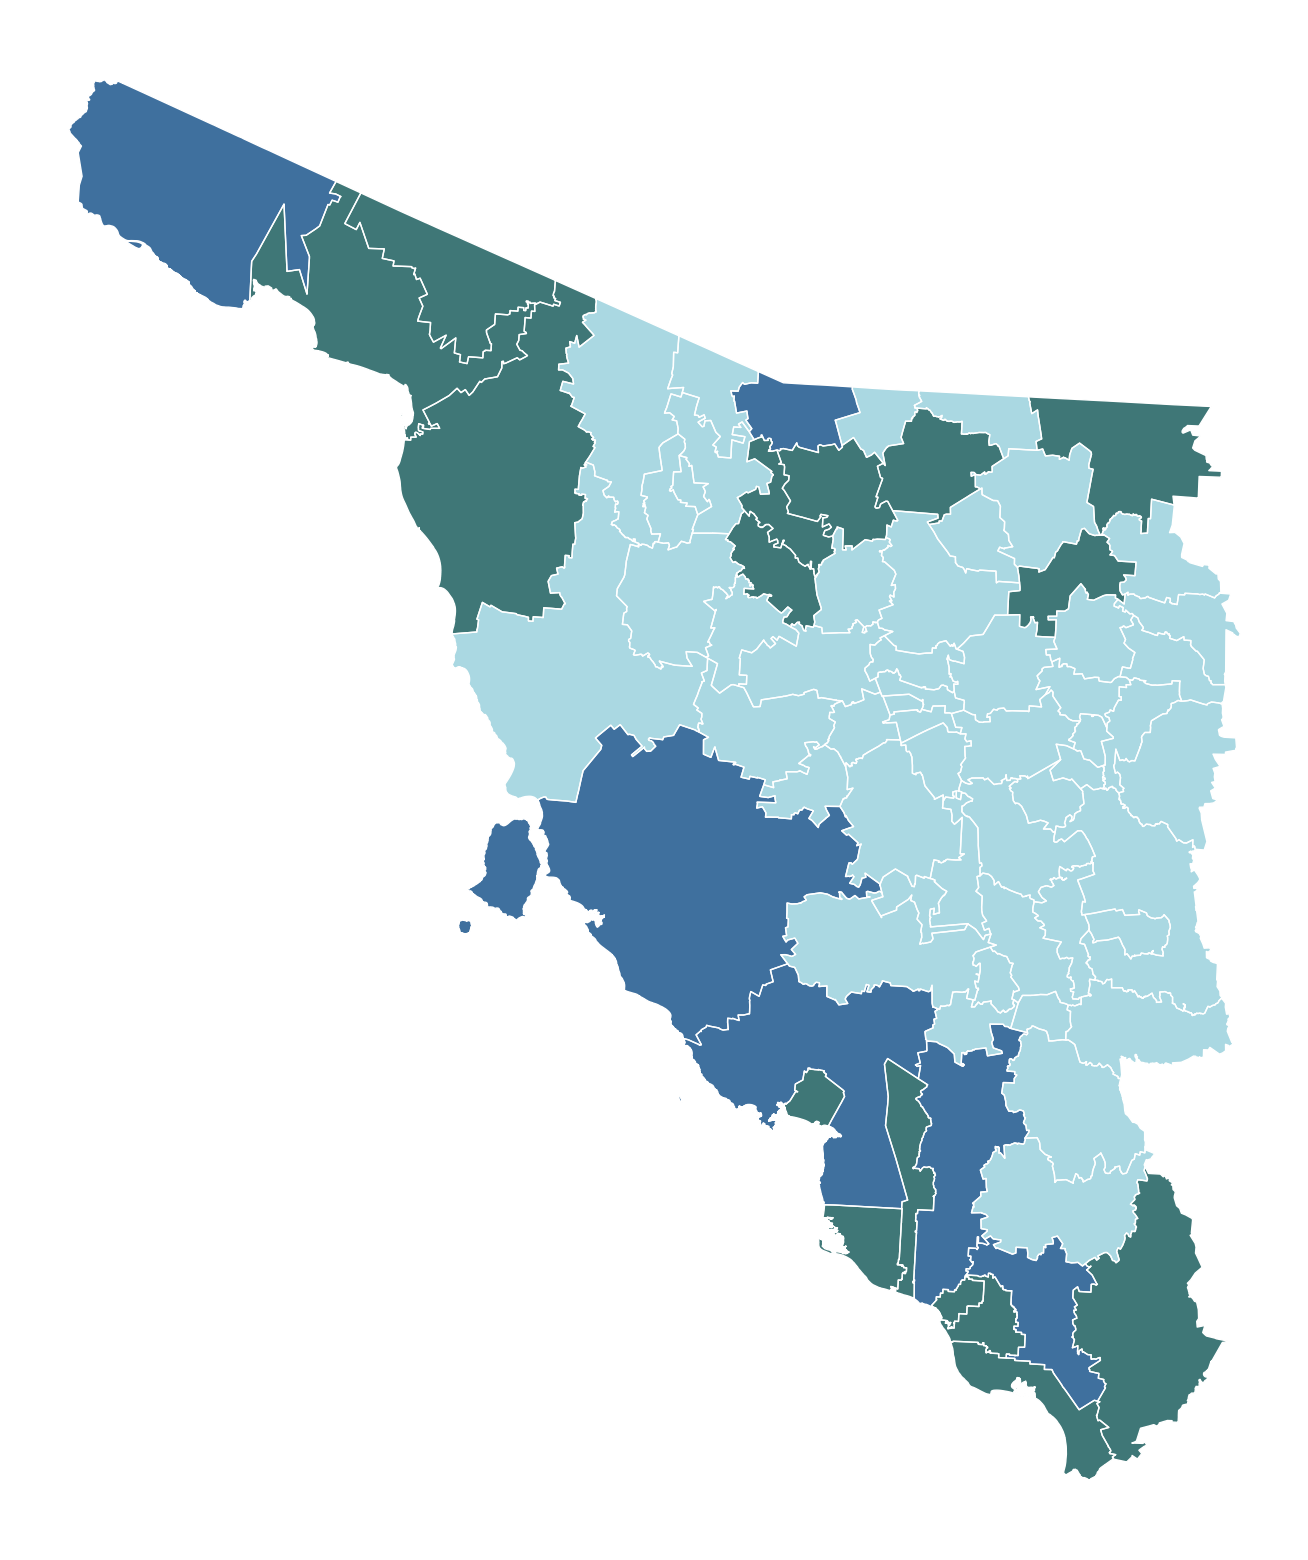

In [25]:
import sys 
import matplotlib.pyplot as plt
import mapper_colors as mapclr
sys.path.insert(1,'MAPPER\\colors')
from colors import gallery

urban_types = ['URBANOS', 'SEMI URBANOS', 'RURALES']

urban_colors = mapclr.code_values(urban_types, gallery.urban_map)
fig1, axs = plt.subplots(figsize = (20,20))
mapclr.color_map(sonora_d, 'Tipo', urban_colors, axs)


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


'legend_colors'


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


0

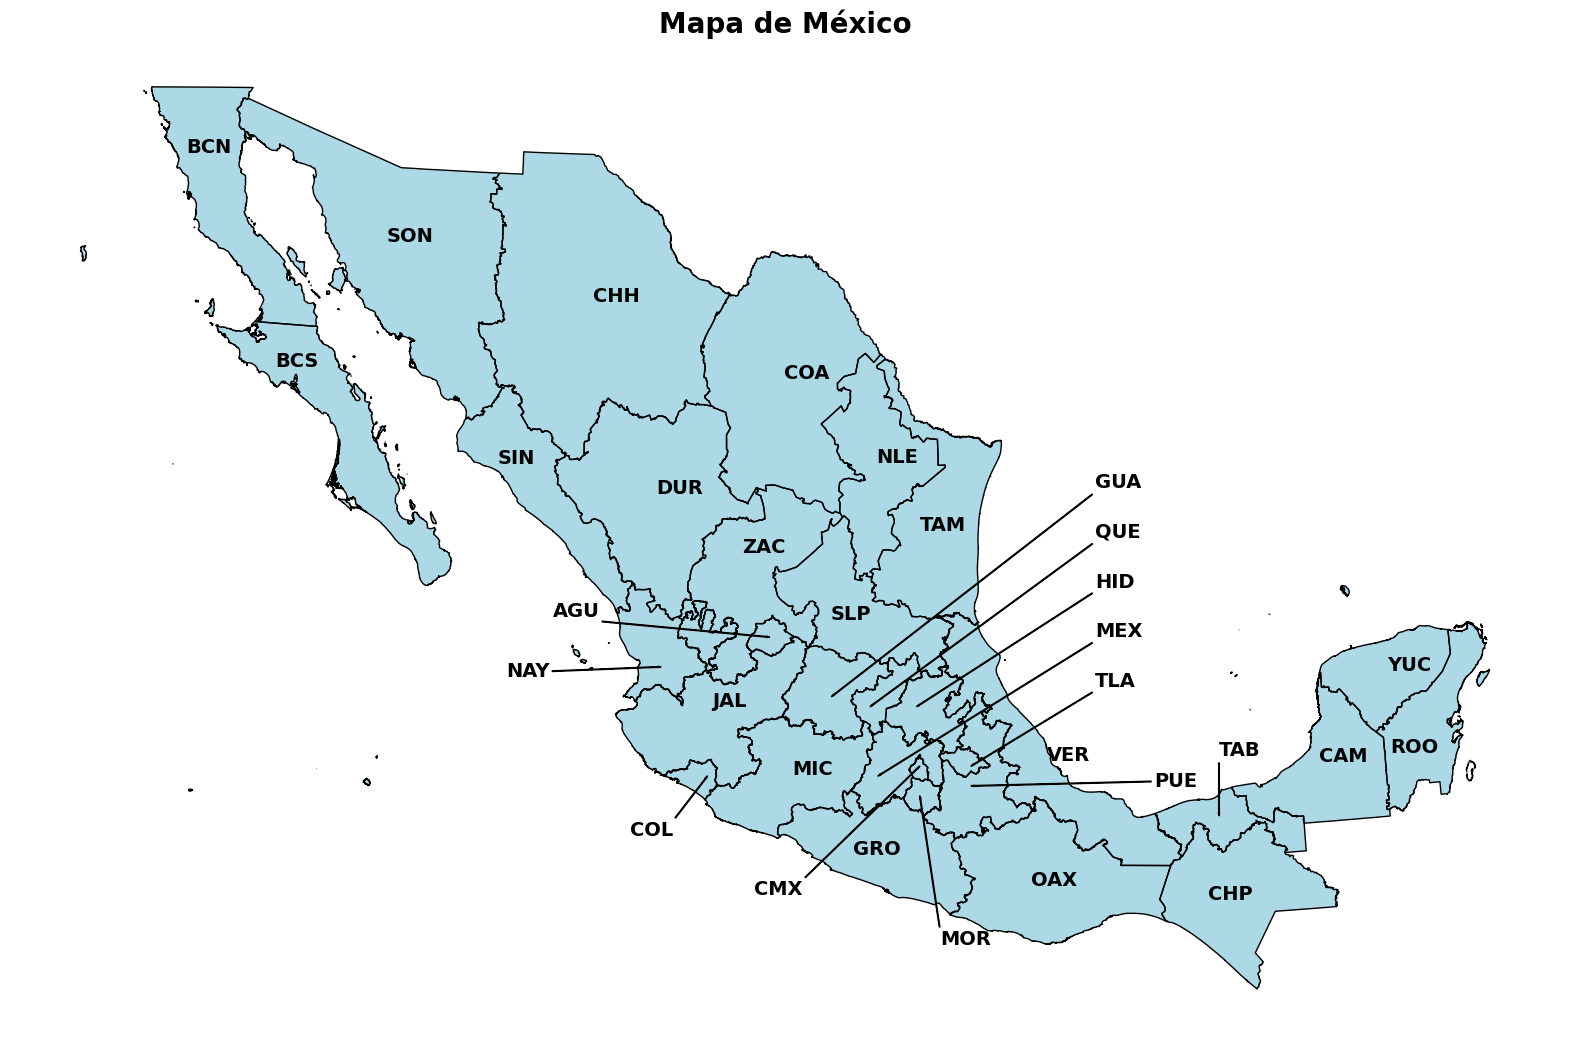

In [26]:
import mapper_addons as addon
template = pd.read_excel('templates\\00.xlsx', index_col=0)
fig1, ax1 = plt.subplots(figsize = (20,20))
addon.read_template(mexico, template, ax1)

'legend_colors'


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(1300000.0, 1680000.0, '●  Menos del 30 %')

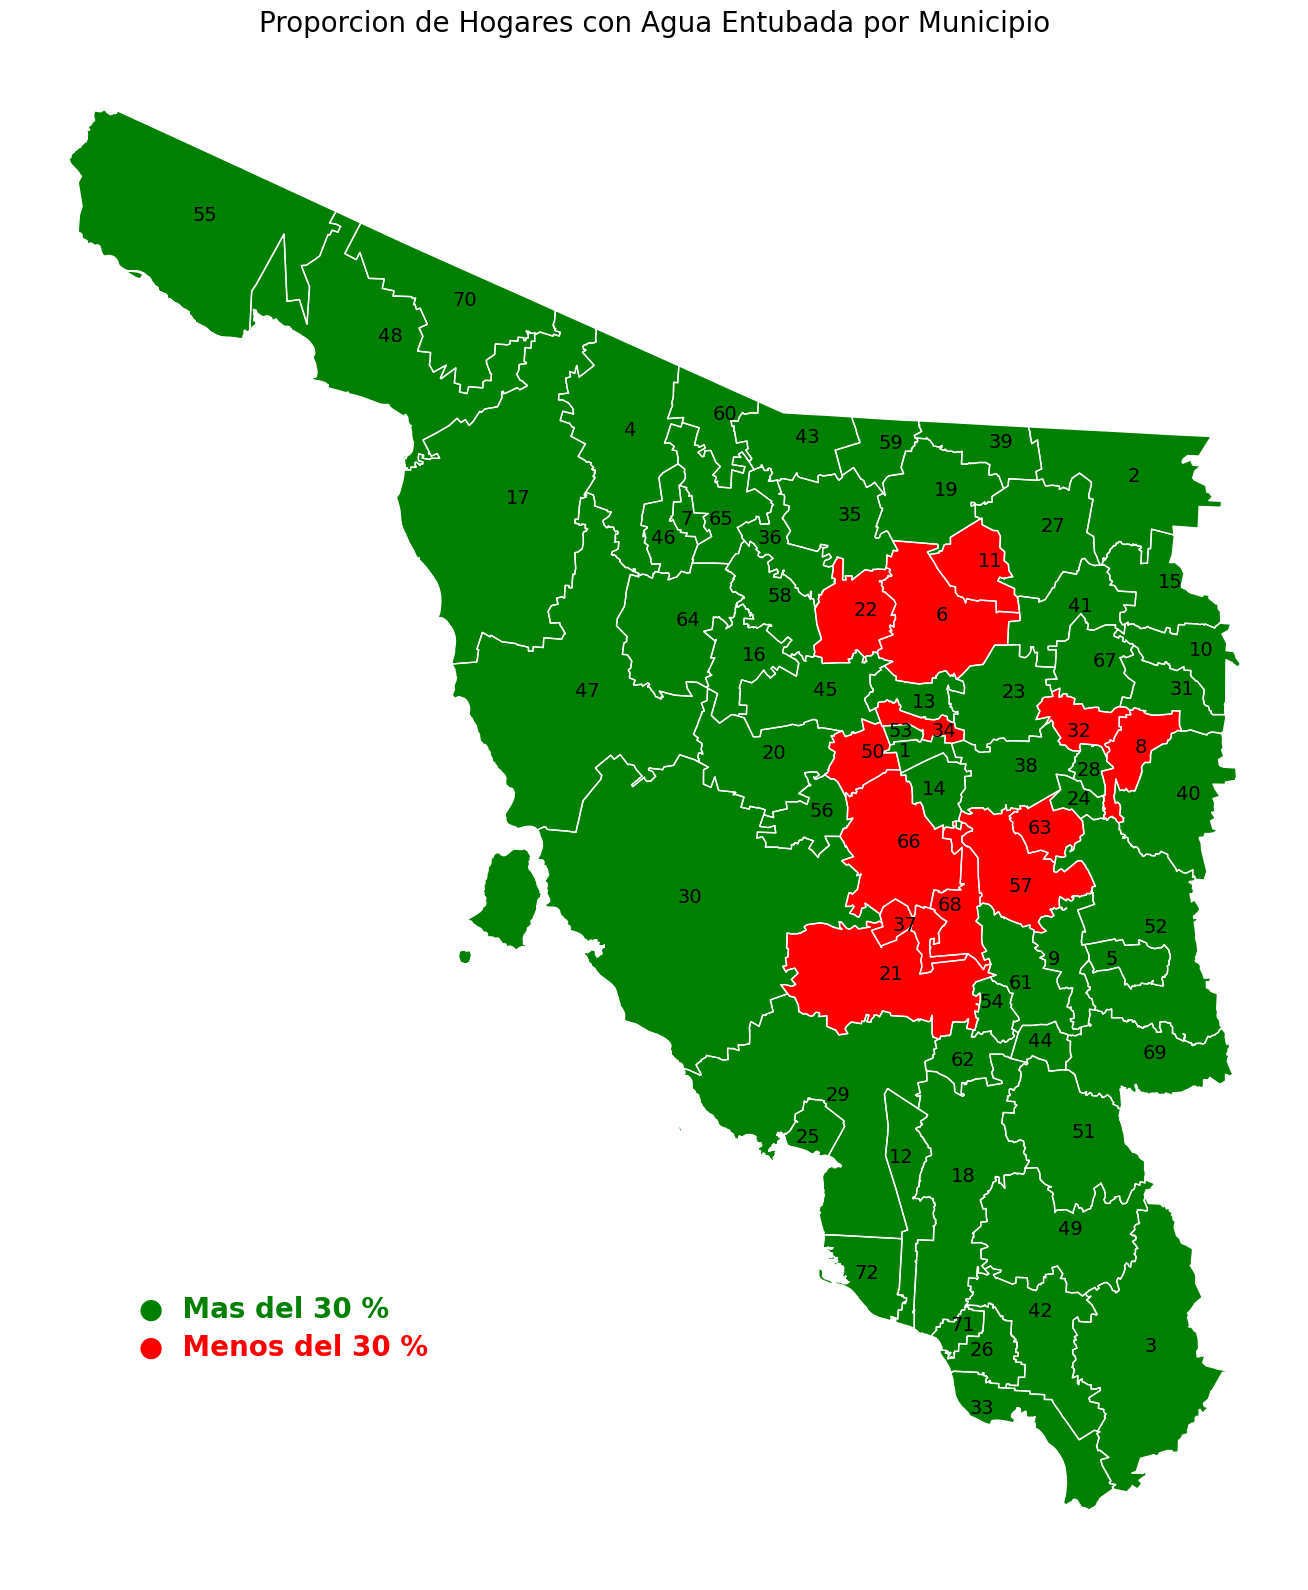

In [27]:
template = pd.read_excel('templates\\26.xlsx',index_col=0)
data1 = pd.read_excel('data\\water.xlsx',index_col=0)
data1.index = template.index

template12 = template.copy()
template12['data'] = data1['<12']

color_good = 'green'
color_criter = 60
color_bad = 'red'
color_data = []



for d in template12['data']:
    if d > 30:
        color_data.append(color_good)
    else:
        color_data.append(color_bad)



template12['color_relleno'] = color_data
template12['title'] = 'Proporcion de Hogares con Agua Entubada por Municipio'
template12['title_conf'] = '20,black,None'

fig1, ax1 = plt.subplots(figsize = (20,20))
addon.read_template(sonora, template12, ax1)
ax1.annotate('●  Mas del 30 % ', xy = (1.5e6,2e6), xytext=(1.3e6,1.7e6), color = 'green', weight = 'bold', fontsize = 20)
ax1.annotate('●  Menos del 30 %', xy = (1.5e6,2e6), xytext=(1.3e6,1.68e6), color = 'red', weight = 'bold', fontsize = 20)


In [28]:
template12.loc['Aconchi','color_relleno'] = 'purple'
template12.loc['Hermosillo','color_relleno'] = 'purple'

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


'legend_colors'


Text(1300000.0, 1680000.0, '●  Menos del 30 %')

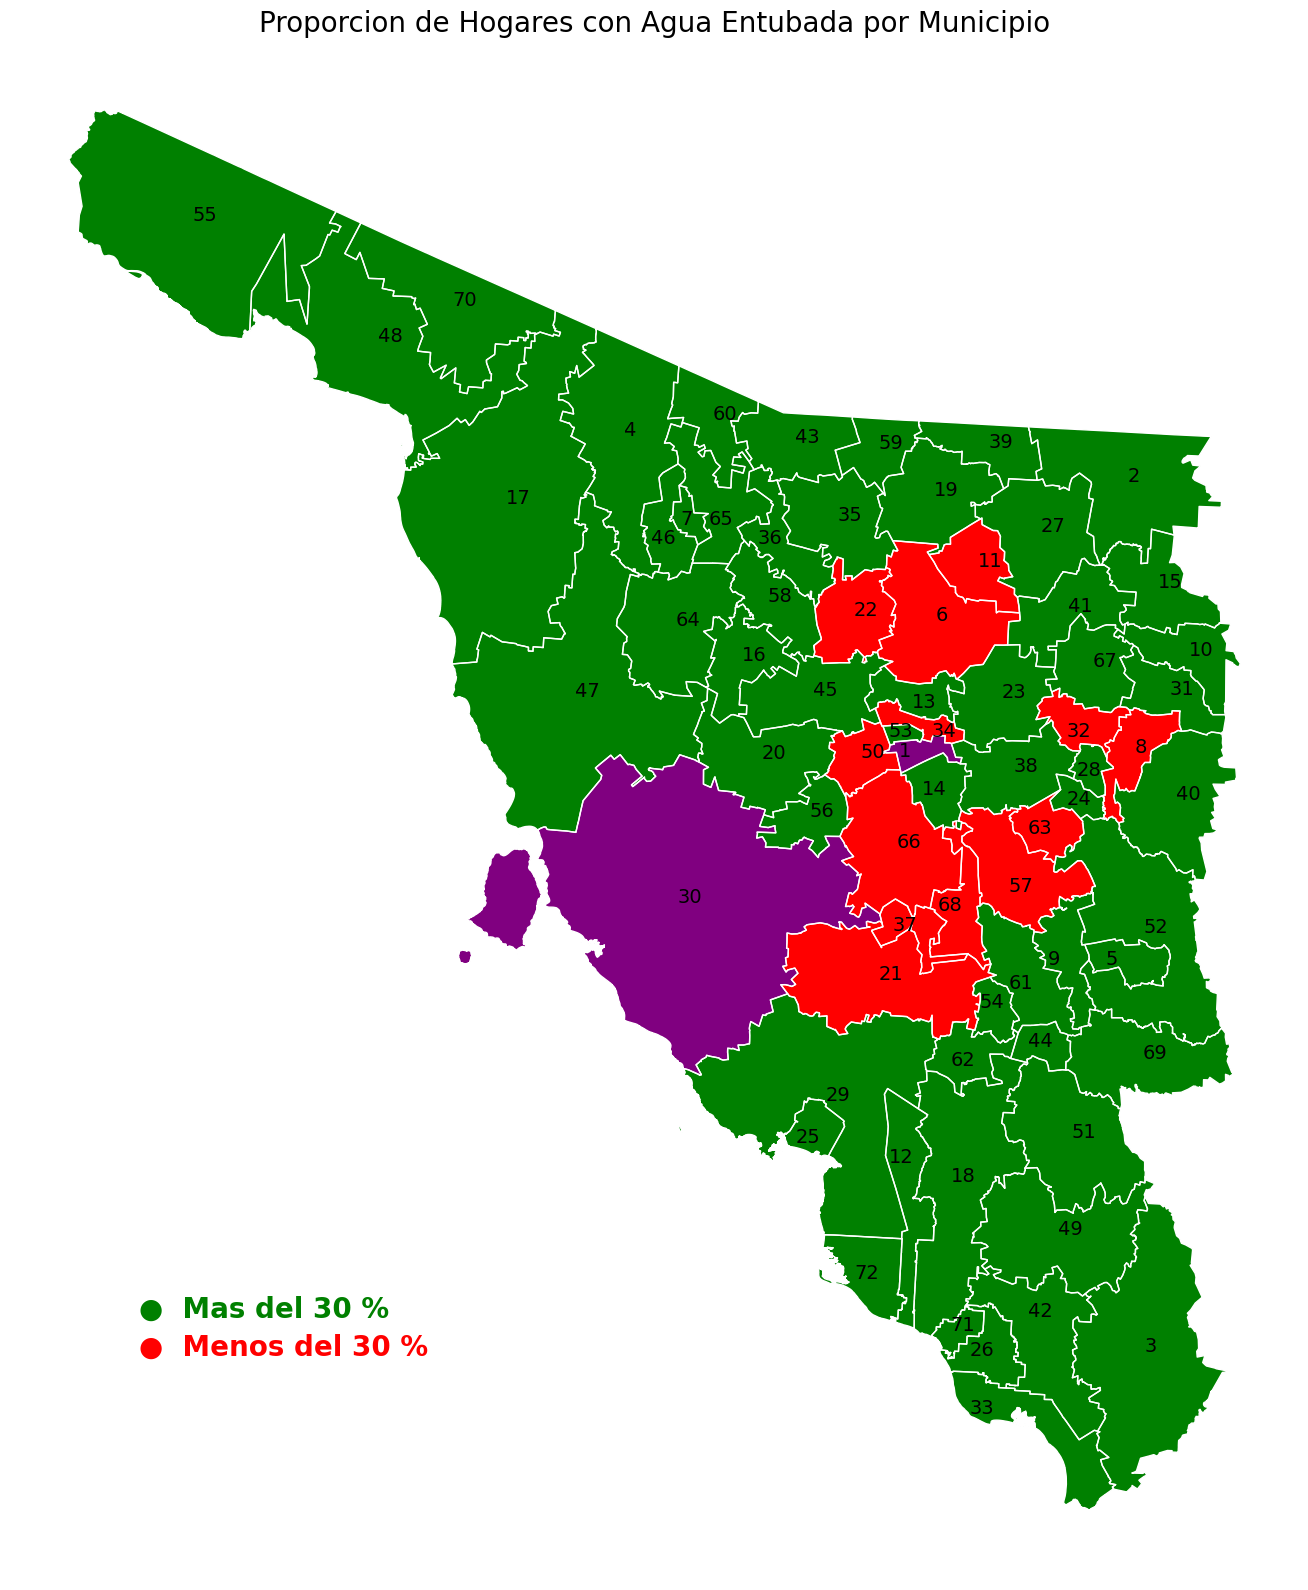

In [29]:
sonora2 = sonora.sort_values('CVE_MUN')

fig1, ax1 = plt.subplots(figsize = (20,20))
addon.read_template(sonora2, template12, ax1)
ax1.annotate('●  Mas del 30 % ', xy = (1.5e6,2e6), xytext=(1.3e6,1.7e6), color = 'green', weight = 'bold', fontsize = 20)
ax1.annotate('●  Menos del 30 %', xy = (1.5e6,2e6), xytext=(1.3e6,1.68e6), color = 'red', weight = 'bold', fontsize = 20)


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:627: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


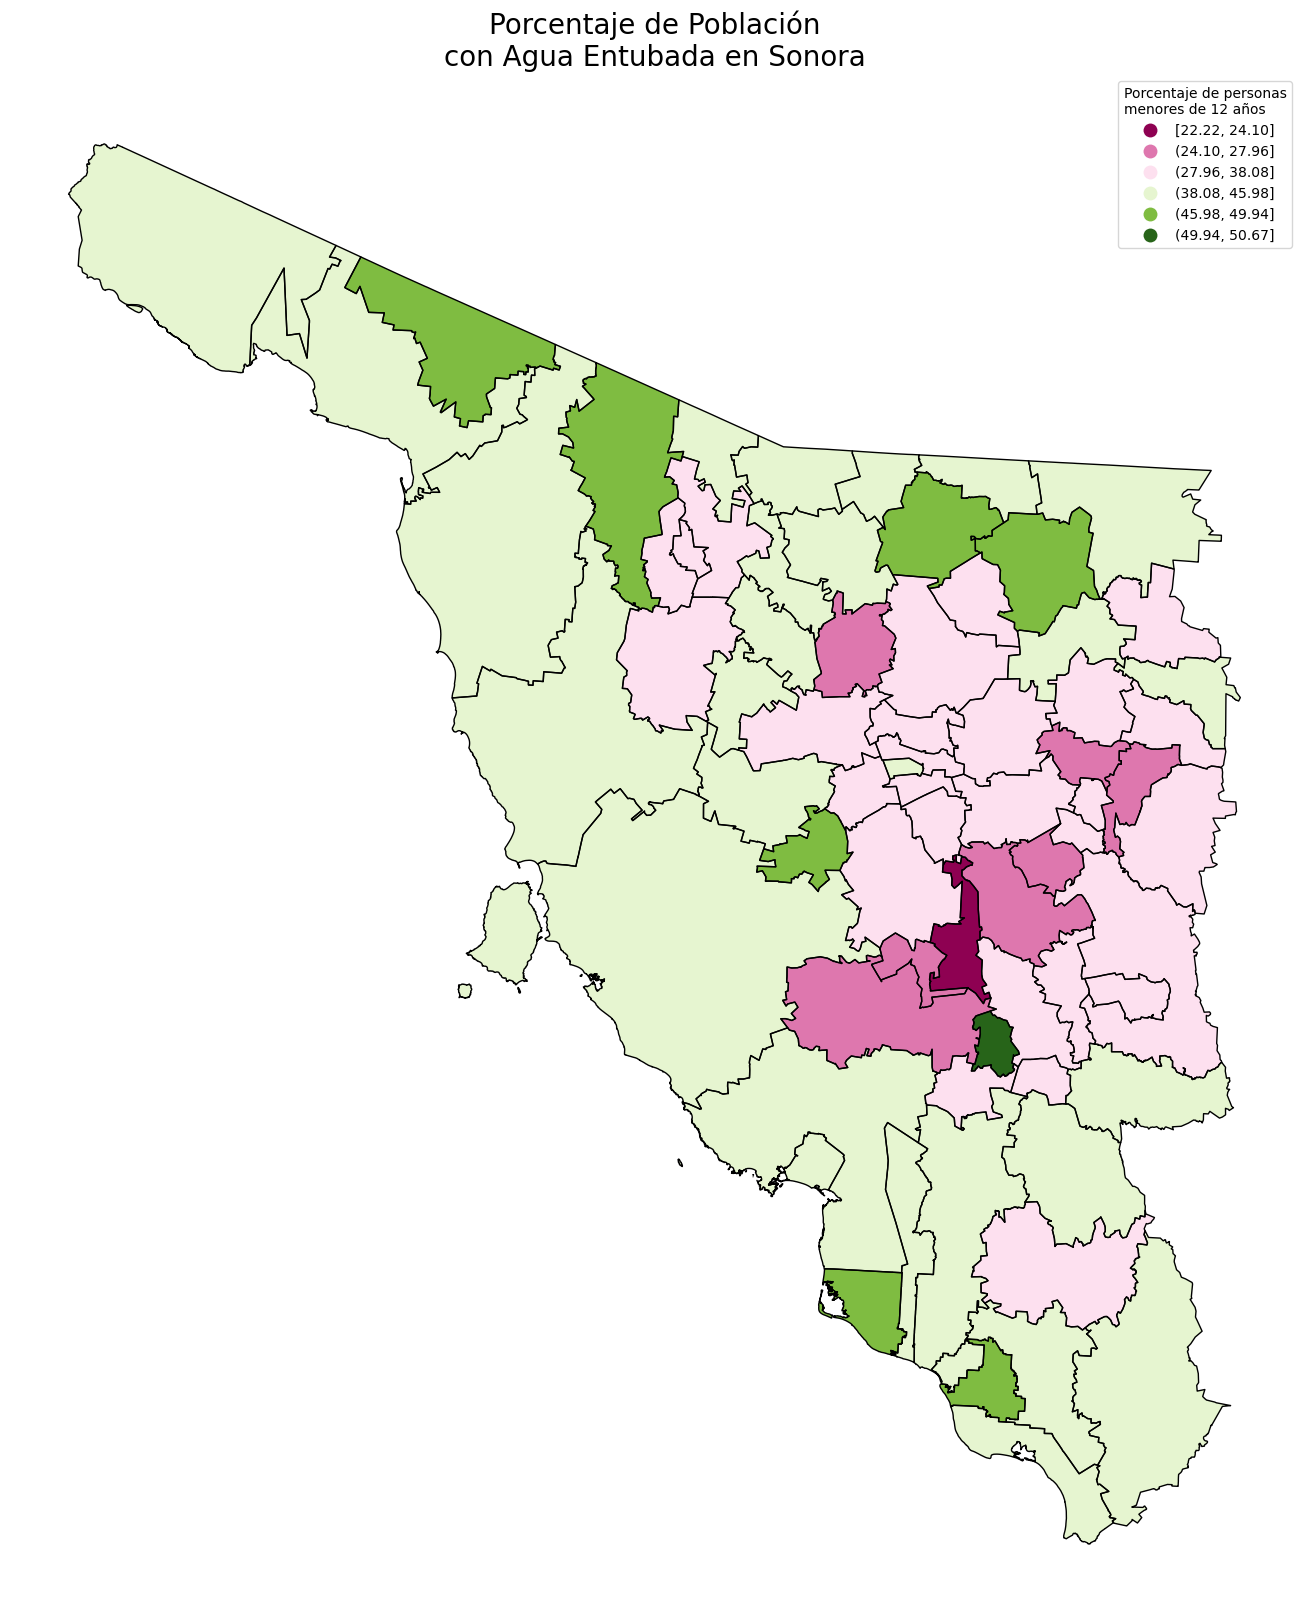

In [30]:
sonora2['data'] = data1['<12'].to_list()
fig_data, ad_1 = plt.subplots(figsize = (20,20)) 
sonora2.plot('data', scheme = 'percentiles', colormap = 'PiYG',
             legend = True, ax = ad_1, legend_kwds = {
    'title':'Porcentaje de personas\nmenores de 12 años',
    'interval': True
})
sonora2.boundary.plot(lw = 1, color = 'black', ax = ad_1)
ad_1.set_title('Porcentaje de Población\ncon Agua Entubada en Sonora', fontsize = 20)
ad_1.set_axis_off()

In [31]:
template12['legend_colors'] = pd.NA
template12['legend_names'] = pd.NA
template12['legend_config'] = '14,black,None'
template12.loc['Aconchi',['legend_x','legend_y']] = [1.3, 2]

template12.loc['Benito Juárez', 'color_relleno'] = '#AAAAAA'
leg_cols = template12['color_relleno'].unique()
leg_label = [ 'Extras', 'Mayor del 30%','Menor del 30%','Benito Juárez']
print(leg_cols)
for k in range(len(leg_cols)):
    template12.iloc[k, -5] = leg_cols[k]
    template12.iloc[k, -4] = leg_label[k]

legend_df = addon.legend_df(template12)
leg_cf = gc.text_to_list(template12.loc['Aconchi','legend_config'])
print(template12[['legend_colors','legend_names']])
legend_df

['purple' 'green' 'red' '#AAAAAA']
                              legend_colors   legend_names
NOMGEO                                                    
Aconchi                              purple         Extras
Agua Prieta                           green  Mayor del 30%
Álamos                                  red  Menor del 30%
Altar                               #AAAAAA  Benito Juárez
Arivechi                               <NA>           <NA>
...                                     ...            ...
Villa Pesqueira                         NaN            NaN
Yécora                                  NaN            NaN
General Plutarco Elías Calles           NaN            NaN
Benito Juárez                           NaN            NaN
San Ignacio Río Muerto                  NaN            NaN

[72 rows x 2 columns]


,legend_colors,legend_names
0,purple,Extras
1,green,Mayor del 30%
2,red,Menor del 30%
3,#AAAAAA,Benito Juárez


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


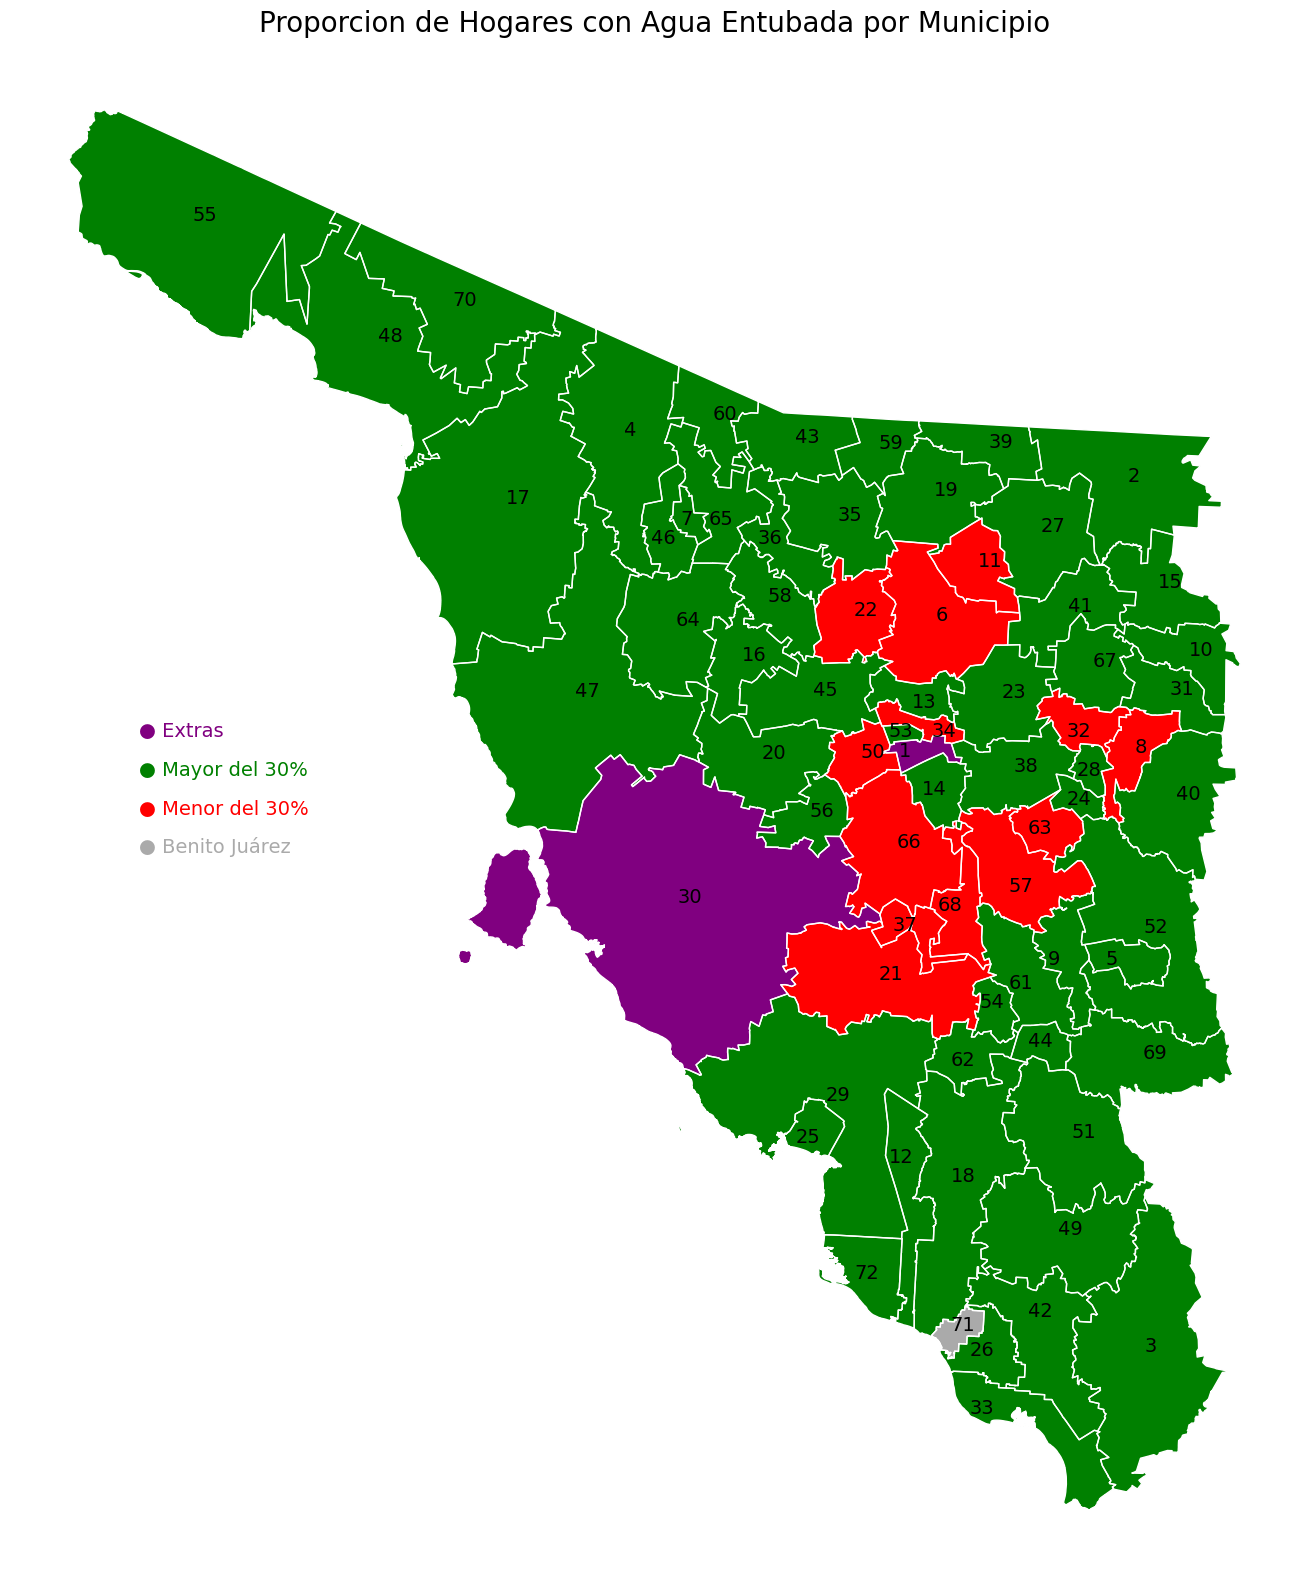

In [32]:
sonora2 = sonora.sort_values('CVE_MUN')
fig1, ax1 = plt.subplots(figsize = (20,20))
addon.read_template(sonora2, template12, ax1)
def legend(legend_df, x,y, ax1, **kwargs):
    s = kwargs.get('sep', 0.02)
    for i in legend_df.index:
        leg_c,leg_t = legend_df.loc[i,'legend_colors'], legend_df.loc[i,'legend_names']
        print(leg_c,leg_t)
        leg_cf[2] = leg_cf[2] if leg_cf[2] != 'None' else None
        ax1.annotate(f'● {leg_t}', xy = (1.5e6,2e6), xytext=(x * 1e6, (y - s * i) * 1e6)
                    , color = leg_c, weight = leg_cf[2], fontsize = leg_cf[0])
# legend(legend_df, 1.3, 1.7, ax1)

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


0

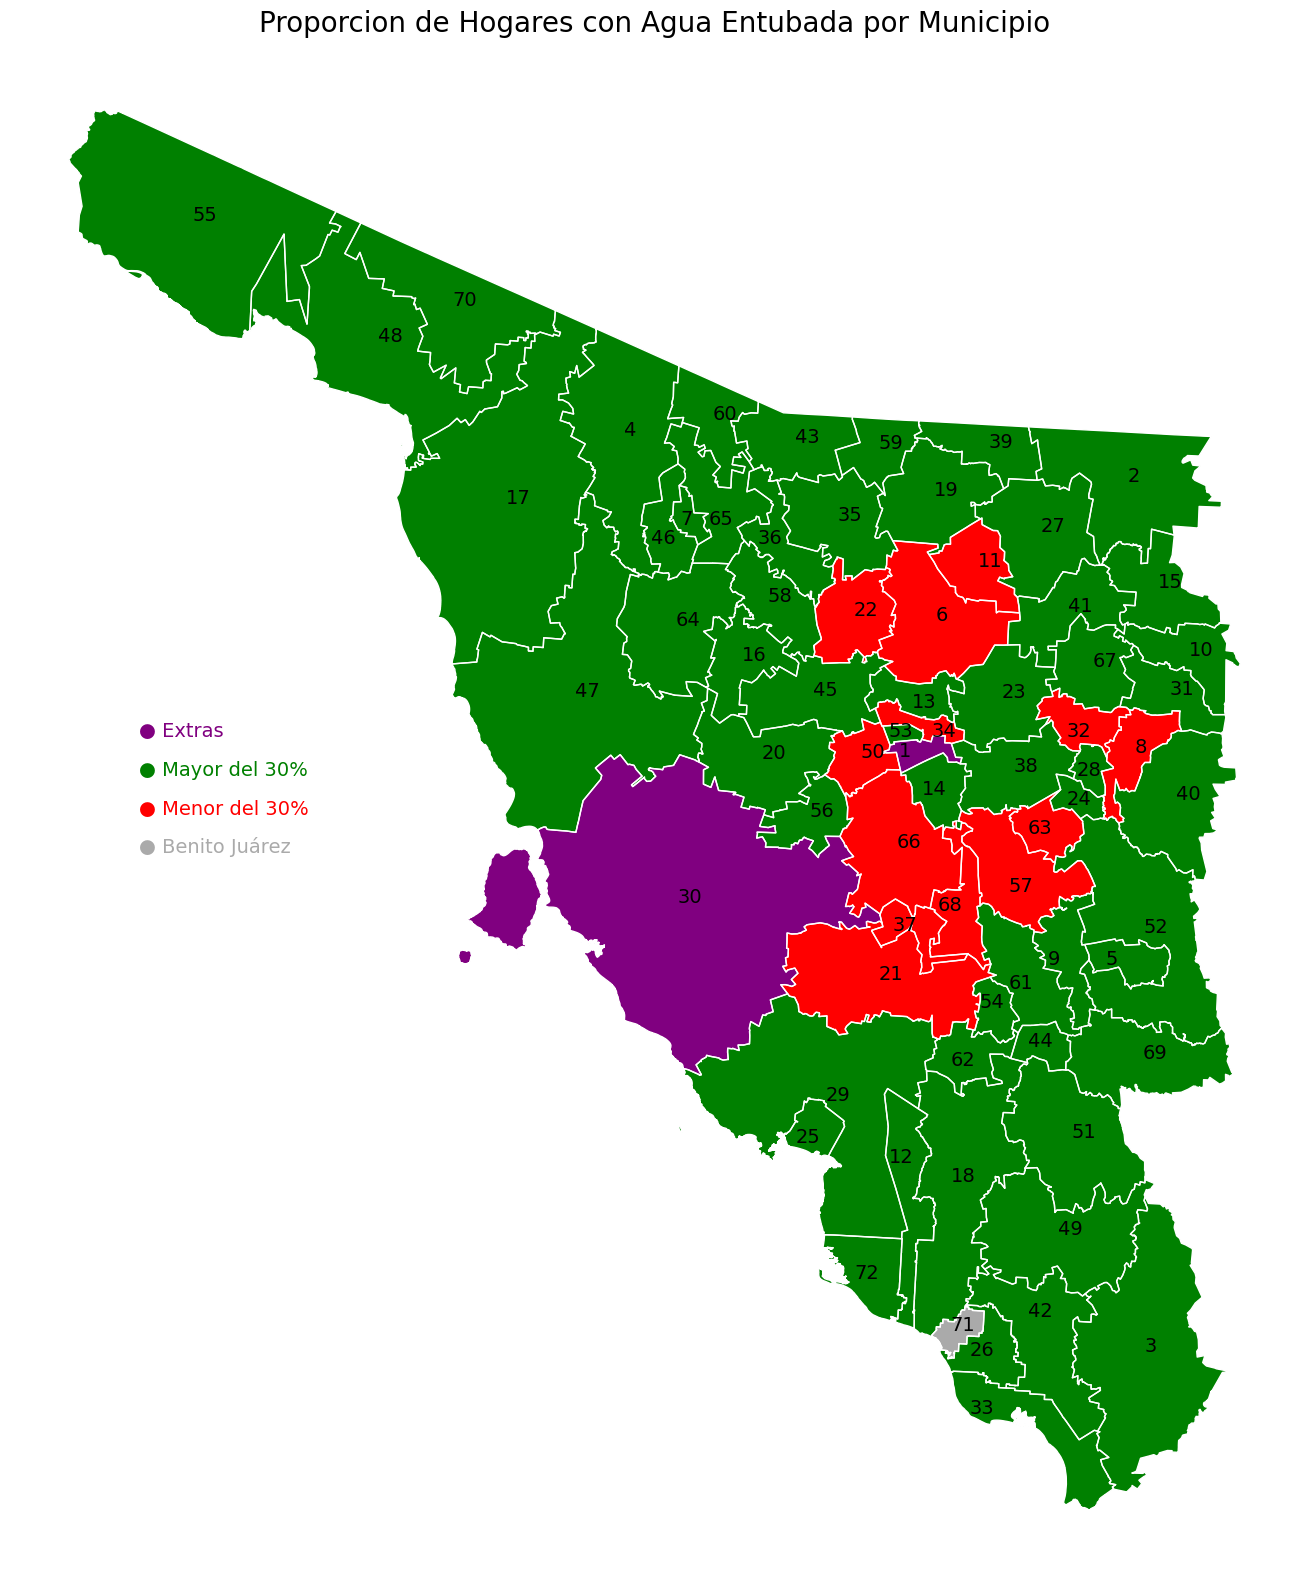

In [33]:

fig1, ax1 = plt.subplots(figsize = (20,20))
addon.read_template(sonora2, template12, ax1)

# legend(legend_df, 1.3, 2, ax1)

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


0

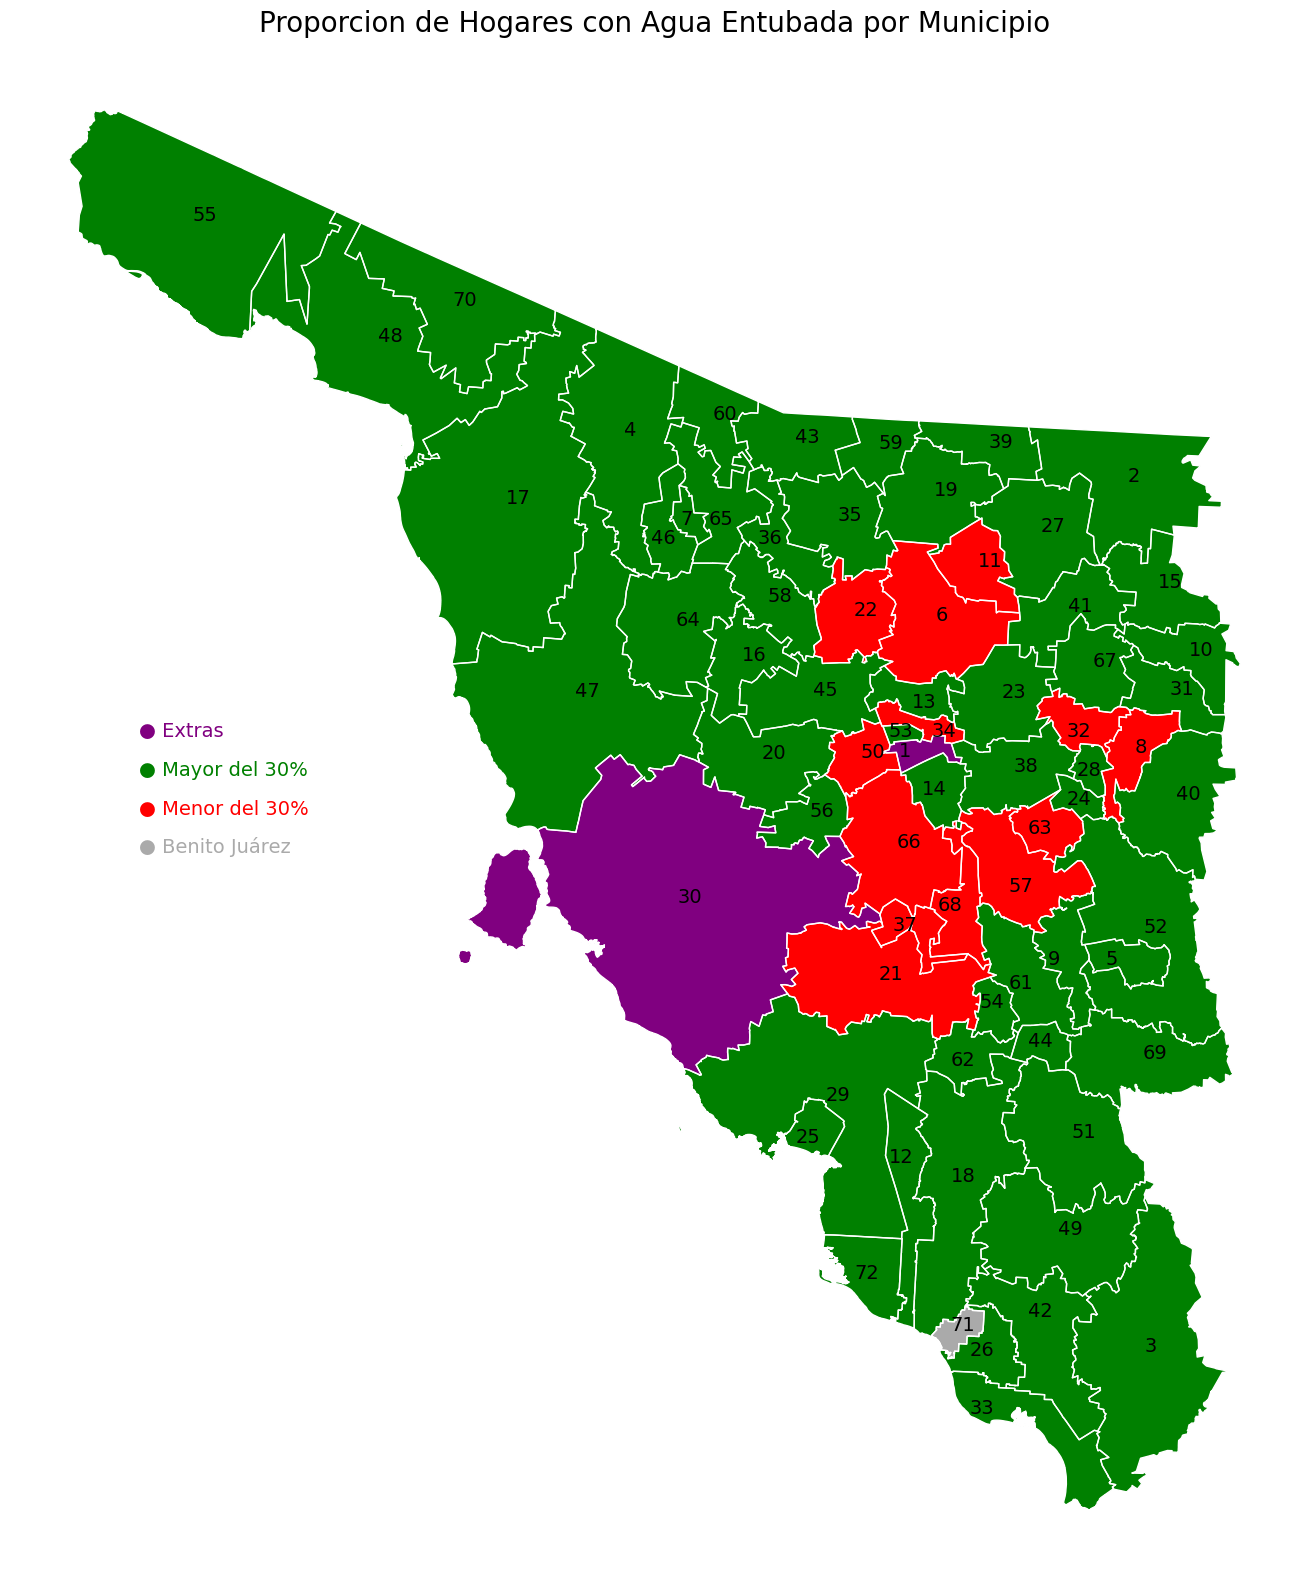

In [34]:
fig1, ax1 = plt.subplots(figsize = (20,20))
addon.read_template(sonora2, template12, ax1)

# legend(legend_df, 1.3, 2, ax1, sep = 0.015)

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


,texto,color_relleno,bd,axis,texto_x,texto_y,flecha_x,flecha_y,flecha,flecha_conf,text_conf,title,title_conf,data,legend_colors,legend_names,legend_config,legend_x,legend_y
NOMGEO,,,,,,,,,,,,,,,,,,,
Aconchi,1,purple,"1,blue,1",0,1.693000e+06,1.990000e+06,1800000,2000000,0,"0.5,black,1,2","14,black,bold",Proporcion de Hogares con Agua Entubada por Mu...,"20,black,None",34.190231,purple,Extras,"14,black,None",1.3,1.7
Agua Prieta,2,green,"1,blue,1",0,1.811330e+06,2.132136e+06,1800000,2000000,0,"0.5,black,1,2","14,black,bold",Proporcion de Hogares con Agua Entubada por Mu...,"20,black,None",43.871326,green,Mayor del 30%,"14,black,None",NaN,NaN
Álamos,3,green,"1,blue,1",0,1.820431e+06,1.682062e+06,1800000,2000000,0,"0.5,black,1,2","14,black,bold",Proporcion de Hogares con Agua Entubada por Mu...,"20,black,None",42.346209,red,Menor del 30%,"14,black,None",NaN,NaN
Altar,4,green,"1,blue,1",0,1.551269e+06,2.155609e+06,1800000,2000000,0,"0.5,black,1,2","14,black,bold",Proporcion de Hogares con Agua Entubada por Mu...,"20,black,None",47.547170,#AAAAAA,Benito Juárez,"14,black,None",NaN,NaN
Arivechi,5,green,"1,blue,1",0,1.800000e+06,1.882000e+06,1800000,2000000,0,"0.5,black,1,2","14,black,bold",Proporcion de Hogares con Agua Entubada por Mu...,"20,black,None",32.731959,<NA>,<NA>,"14,black,None",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villa Pesqueira,68,red,"1,blue,1",0,1.713000e+06,1.910000e+06,1800000,2000000,0,"0.5,black,1,2","14,black,bold",Proporcion de Hogares con Agua Entubada por Mu...,"20,black,None",22.222222,<NA>,<NA>,"14,black,None",NaN,NaN
Yécora,69,green,"1,blue,1",0,1.819066e+06,1.833635e+06,1800000,2000000,0,"0.5,black,1,2","14,black,bold",Proporcion de Hogares con Agua Entubada por Mu...,"20,black,None",42.645241,<NA>,<NA>,"14,black,None",NaN,NaN
General Plutarco Elías Calles,70,green,"1,blue,1",0,1.462059e+06,2.222881e+06,1800000,2000000,0,"0.5,black,1,2","14,black,bold",Proporcion de Hogares con Agua Entubada por Mu...,"20,black,None",49.638336,<NA>,<NA>,"14,black,None",NaN,NaN


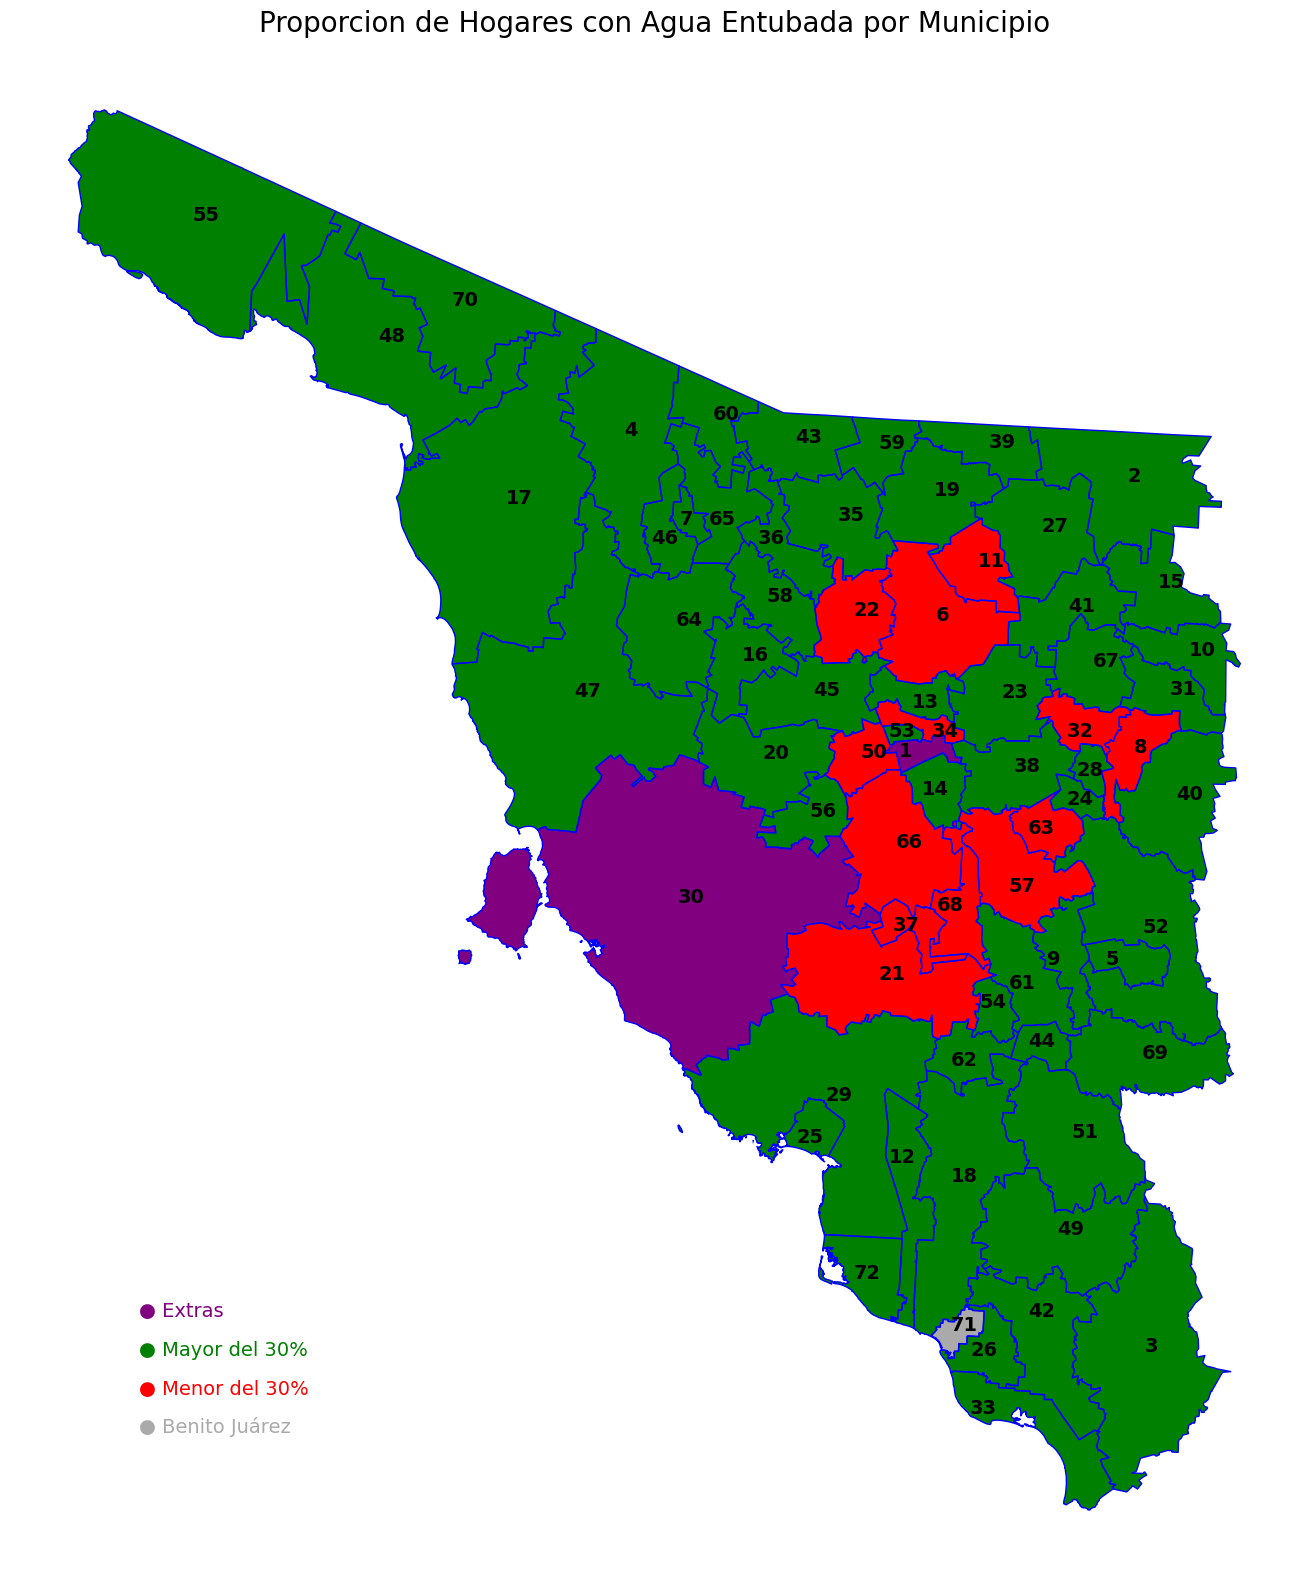

In [35]:
template12.loc['Aconchi',['legend_x','legend_y']] = [1.3, 1.7]
template12['text_conf'] = "14,black,bold"
template12['bd'] = '1,blue,1'
fig1, ax1 = plt.subplots(figsize = (20,20))
addon.read_template(sonora2, template12, ax1)
template12